In [1]:
def file_paths(dataset_directory):
    import glob
    paths =[]
    for x in glob.iglob(dataset_directory + "*.txt"):
        paths.append(x)
    return paths

In [2]:
def file_properties(path):
    import re
    list_of_matches = re.findall("out_(\d+)_(\d+)_(\d+)_(\d+).txt", path)
    arr = list_of_matches.pop()
    return int(arr[0]),int(arr[1]),int(arr[2]),int(arr[3])

In [3]:
def file_reader(str):
    import re
    list_of_matches = re.findall("(........) seconds", str)
    arr = list_of_matches.pop()
    return float(arr)

In [5]:
import pandas as pd
paths= file_paths("Homework_runs/")
properties_list = []
for path in paths:
    with open(path) as file:
        pow,iter,dtype,optimization = file_properties(path)
        str = file.read()
        seconds = file_reader(str)
        properties_list.append([pow,iter,dtype,optimization,seconds])
print(properties_list)
df = pd.DataFrame(properties_list,columns=["pow","iteration","dtype","optimization","seconds"])
print(df)

[[4, 3, 2, 2, 1.7e-05], [4, 2, 0, 0, 4.1e-05], [5, 1, 1, 2, 0.000191], [1, 1, 0, 1, 1e-06], [2, 3, 0, 1, 2e-06], [4, 3, 2, 0, 4.1e-05], [2, 3, 0, 3, 1e-06], [2, 1, 0, 3, 1e-06], [5, 2, 2, 0, 0.000207], [4, 1, 2, 1, 3.3e-05], [1, 2, 0, 0, 4e-06], [3, 2, 0, 0, 1.5e-05], [4, 2, 2, 0, 5.4e-05], [5, 1, 1, 3, 0.000148], [4, 1, 2, 0, 7.4e-05], [5, 1, 0, 2, 9.8e-05], [1, 1, 0, 3, 1e-06], [3, 2, 2, 0, 1.3e-05], [5, 1, 2, 1, 0.000275], [5, 2, 1, 1, 0.000187], [4, 1, 0, 1, 4.5e-05], [1, 2, 2, 1, 1e-06], [3, 1, 2, 3, 5e-06], [3, 2, 0, 3, 2e-06], [2, 2, 1, 2, 2e-06], [3, 1, 1, 3, 6e-06], [4, 2, 2, 3, 2.4e-05], [3, 3, 1, 1, 1e-05], [2, 2, 2, 2, 2e-06], [3, 3, 2, 1, 7e-06], [5, 1, 0, 3, 0.000112], [5, 3, 1, 1, 0.000134], [2, 2, 0, 0, 5e-06], [4, 1, 1, 3, 3.3e-05], [3, 2, 2, 3, 7e-06], [5, 2, 2, 2, 0.000177], [1, 3, 1, 0, 0.0], [1, 1, 2, 3, 1e-06], [4, 1, 0, 2, 1.4e-05], [3, 1, 2, 1, 5e-06], [4, 2, 2, 1, 4.5e-05], [1, 2, 1, 2, 4e-06], [1, 3, 0, 0, 2e-06], [3, 2, 0, 2, 3e-06], [1, 2, 2, 3, 1e-06], [3, 

In [7]:
max_pow = int(df['pow'].max())
print(max_pow)

5


In [17]:
list_of_y = []


number_list=range(0,max_pow-1)
type_list= range(0,2)
optimization_list = range(0,3)
for o in optimization_list:
    list_of_y.append([])
    for dt in type_list:
        list_of_y[o].append([])
        for x in number_list:
            print(x)
            list_of_y[o][dt].append([]).append([]).append([])
            max_y = df.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["seconds"].max()
            list_of_y[o][dt][0].append(max_y)
            min_y = df.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["seconds"].min()
            list_of_y[o][dt][1].append(min_y)
            list_of_y[o][dt][2].append((max_y+min_y)/2)

0


AttributeError: 'NoneType' object has no attribute 'append'

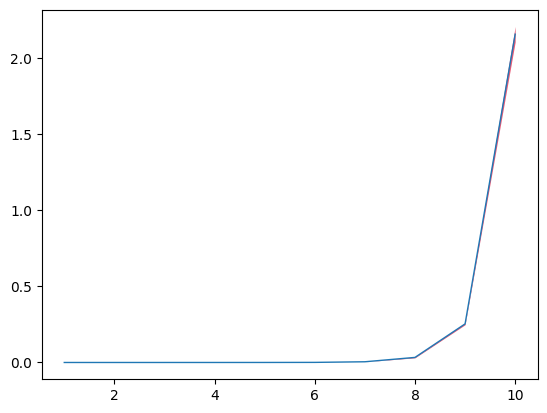

In [10]:
import matplotlib.pyplot as plt
# plot
fig, ax = plt.subplots()

ax.fill_between(number_list,down_y, up_y,  alpha=.7, linewidth=0,color="crimson")
ax.plot(number_list, mid_y, linewidth=1)


plt.show()